## First Innings Score Prediction

In [120]:
# Importing essential libraries
import pandas as pd
import pickle

# Loading the dataset
df = pd.read_csv('C:/Users/niyaz/Downloads/IPL-First-Innings-Score-Prediction-Deployment-master/ipl.csv')

In [121]:
df.head()

mid        date                  venue               bat_team  \
0    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
1    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
2    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
3    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
4    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   

                     bowl_team      batsman   bowler  runs  wickets  overs  \
0  Royal Challengers Bangalore   SC Ganguly  P Kumar     1        0    0.1   
1  Royal Challengers Bangalore  BB McCullum  P Kumar     1        0    0.2   
2  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.2   
3  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.3   
4  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.4   

   runs_last_5  wickets_last_5  striker  non-striker  total  
0            1               0        0            0    222  
1            1               0        0            0    222  
2            2               0        0            0    222  
3            2               0        0            0    222  
4            2               0        0            0    222

In [122]:
# --- Data Cleaning ---
# Removing unwanted columns
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
df.drop(labels=columns_to_remove, axis=1, inplace=True)

In [123]:
df.head()

date               bat_team                    bowl_team  runs  \
0  2008-04-18  Kolkata Knight Riders  Royal Challengers Bangalore     1   
1  2008-04-18  Kolkata Knight Riders  Royal Challengers Bangalore     1   
2  2008-04-18  Kolkata Knight Riders  Royal Challengers Bangalore     2   
3  2008-04-18  Kolkata Knight Riders  Royal Challengers Bangalore     2   
4  2008-04-18  Kolkata Knight Riders  Royal Challengers Bangalore     2   

   wickets  overs  runs_last_5  wickets_last_5  total  
0        0    0.1            1               0    222  
1        0    0.2            1               0    222  
2        0    0.2            2               0    222  
3        0    0.3            2               0    222  
4        0    0.4            2               0    222

In [124]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [125]:
# Keeping only consistent teams
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [126]:
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]

In [127]:
# Removing the first 5 overs data in every match
df = df[df['overs']>=5.0]

In [128]:
df.head()

date               bat_team                    bowl_team  runs  \
32  2008-04-18  Kolkata Knight Riders  Royal Challengers Bangalore    61   
33  2008-04-18  Kolkata Knight Riders  Royal Challengers Bangalore    61   
34  2008-04-18  Kolkata Knight Riders  Royal Challengers Bangalore    61   
35  2008-04-18  Kolkata Knight Riders  Royal Challengers Bangalore    61   
36  2008-04-18  Kolkata Knight Riders  Royal Challengers Bangalore    61   

    wickets  overs  runs_last_5  wickets_last_5  total  
32        0    5.1           59               0    222  
33        1    5.2           59               1    222  
34        1    5.3           59               1    222  
35        1    5.4           59               1    222  
36        1    5.5           58               1    222

In [129]:
print(df['bat_team'].unique())
print(df['bowl_team'].unique())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40108 entries, 32 to 75888
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            40108 non-null  object 
 1   bat_team        40108 non-null  object 
 2   bowl_team       40108 non-null  object 
 3   runs            40108 non-null  int64  
 4   wickets         40108 non-null  int64  
 5   overs           40108 non-null  float64
 6   runs_last_5     40108 non-null  int64  
 7   wickets_last_5  40108 non-null  int64  
 8   total           40108 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 3.1+ MB


In [131]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [132]:
# --- Data Preprocessing ---
# Converting categorical features using OneHotEncoding method
encoded_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])

In [133]:
encoded_df.head()

date  runs  wickets  overs  runs_last_5  wickets_last_5  total  \
32 2008-04-18    61        0    5.1           59               0    222   
33 2008-04-18    61        1    5.2           59               1    222   
34 2008-04-18    61        1    5.3           59               1    222   
35 2008-04-18    61        1    5.4           59               1    222   
36 2008-04-18    61        1    5.5           58               1    222   

    bat_team_Chennai Super Kings  bat_team_Delhi Daredevils  \
32                             0                          0   
33                             0                          0   
34                             0                          0   
35                             0                          0   
36                             0                          0   

    bat_team_Kings XI Punjab  ...  bat_team_Royal Challengers Bangalore  \
32                         0  ...                                     0   
33                         0  ...                                     0   
34                         0  ...                                     0   
35                         0  ...                                     0   
36                         0  ...                                     0   

    bat_team_Sunrisers Hyderabad  bowl_team_Chennai Super Kings  \
32                             0                              0   
33                             0                              0   
34                             0                              0   
35                             0                              0   
36                             0                              0   

    bowl_team_Delhi Daredevils  bowl_team_Kings XI Punjab  \
32                           0                          0   
33                           0                          0   
34                           0                          0   
35                           0                          0   
36                           0                          0   

    bowl_team_Kolkata Knight Riders  bowl_team_Mumbai Indians  \
32                                0                         0   
33                                0                         0   
34                                0                         0   
35                                0                         0   
36                                0                         0   

    bowl_team_Rajasthan Royals  bowl_team_Royal Challengers Bangalore  \
32                           0                                      1   
33                           0                                      1   
34                           0                                      1   
35                           0                                      1   
36                           0                                      1   

    bowl_team_Sunrisers Hyderabad  
32                              0  
33                              0  
34                              0  
35                              0  
36                              0  

[5 rows x 23 columns]

In [134]:
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [135]:
# Rearranging the columns
encoded_df = encoded_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [136]:
# Splitting the data into train and test set
X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2016]
X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2017]

In [137]:
y_train = encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values

In [138]:
# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

In [139]:
encoded_df.head()

date  bat_team_Chennai Super Kings  bat_team_Delhi Daredevils  \
32 2008-04-18                             0                          0   
33 2008-04-18                             0                          0   
34 2008-04-18                             0                          0   
35 2008-04-18                             0                          0   
36 2008-04-18                             0                          0   

    bat_team_Kings XI Punjab  bat_team_Kolkata Knight Riders  \
32                         0                               1   
33                         0                               1   
34                         0                               1   
35                         0                               1   
36                         0                               1   

    bat_team_Mumbai Indians  bat_team_Rajasthan Royals  \
32                        0                          0   
33                        0                          0   
34                        0                          0   
35                        0                          0   
36                        0                          0   

    bat_team_Royal Challengers Bangalore  bat_team_Sunrisers Hyderabad  \
32                                     0                             0   
33                                     0                             0   
34                                     0                             0   
35                                     0                             0   
36                                     0                             0   

    bowl_team_Chennai Super Kings  ...  bowl_team_Mumbai Indians  \
32                              0  ...                         0   
33                              0  ...                         0   
34                              0  ...                         0   
35                              0  ...                         0   
36                              0  ...                         0   

    bowl_team_Rajasthan Royals  bowl_team_Royal Challengers Bangalore  \
32                           0                                      1   
33                           0                                      1   
34                           0                                      1   
35                           0                                      1   
36                           0                                      1   

    bowl_team_Sunrisers Hyderabad  overs  runs  wickets  runs_last_5  \
32                              0    5.1    61        0           59   
33                              0    5.2    61        1           59   
34                              0    5.3    61        1           59   
35                              0    5.4    61        1           59   
36                              0    5.5    61        1           58   

    wickets_last_5  total  
32               0    222  
33               1    222  
34               1    222  
35               1    222  
36               1    222  

[5 rows x 23 columns]

In [140]:
# --- Model Building ---
# Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [141]:
# Creating a pickle file for the classifier
filename = 'first-innings-score-lr-model.pkl'
pickle.dump(regressor, open(filename, 'wb'))

## Ridge Regression

In [142]:
## Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [143]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}  # giving many values of alpha for fine tune of hyper parameters
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

C:\Users\niyaz\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.38587e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\niyaz\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.39768e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\niyaz\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.37981e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\niyaz\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.51925e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\niyaz\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.52442e-18): result may not be accurate

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [144]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-328.4152792487925


In [147]:
prediction=ridge_regressor.predict(X_test)
prediction

array([172.04976684, 175.20021989, 174.59538295, ..., 100.41375553,
        99.84095094,  93.18090251])

C:\Users\niyaz\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

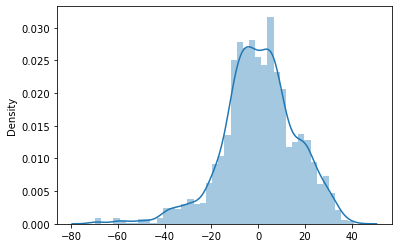

In [148]:
import seaborn as sns
sns.distplot(y_test-prediction)

In [150]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 12.117294527005022
MSE: 251.0317296411275
RMSE: 15.843980864704662


## Lasso Regression

In [151]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [152]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\niyaz\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4479136.119841065, tolerance: 2529.9556965945612
  model = cd_fast.enet_coordinate_descent(
C:\Users\niyaz\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4431553.751721015, tolerance: 2547.038071028659
  model = cd_fast.enet_coordinate_descent(
C:\Users\niyaz\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4289855.092057555, tolerance: 2667.8126904366463
  model = cd_fast.enet_coordinate_descent(
C:\Users\niyaz\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

{'alpha': 1}
-320.8263789858526


In [156]:
prediction=lasso_regressor.predict(X_test)
prediction

array([170.85983934, 174.24824974, 173.46897392, ..., 105.86186741,
       104.87877323,  98.9709836 ])

C:\Users\niyaz\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

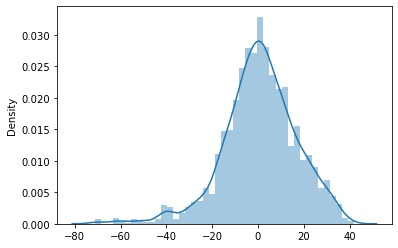

In [157]:
import seaborn as sns
sns.distplot(y_test-prediction)

In [158]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 12.214053814850246
MSE: 262.3797366400714
RMSE: 16.19813991296752
